#### $Y\sim Binomial(m, \pi)$
$P(Y=y)={m\choose y} \pi^y (1-\pi)^{m-y}$
v.s. Bernoulli => $\pi$ remains the same in binomial, while in Bernoulli case it is independent for each $X_i$

$E(Y)=m\pi$, $var(Y)=m\pi(1-\pi)$

Consider modelling $Y.m$ be the proportion of success out of $m$ independent Bernoulli trials 
$E(Y/m)=\pi, var(Y/m)=\pi(1-\pi)/m$

In [1]:
library(Sleuth3)
library(ggplot2)
krunnit = case2101

Extinct = krunnit$Extinct # number of "success"
AtRisk = krunnit$AtRisk
Area = krunnit$Area

pis = Extinct/AtRisk
NExtinct = AtRisk - Extinct # number of "failure"
logitpi = log(pis/(1-(pis)))
logarea = log(Area)
case2101

Island,Area,AtRisk,Extinct
Ulkokrunni,185.80,75,5
Maakrunni,105.80,67,3
Ristikari,30.70,66,10
Isonkivenletto,8.50,51,6
Hietakraasukka,4.80,28,3
Kraasukka,4.50,20,4
Lansiletto,4.30,43,8
Pihlajakari,3.60,31,3
Tyni,2.60,28,5
Tasasenletto,1.70,32,6


Let $\pi_i$ be the probability of extinction for each island, assume that this is the same for each species for bird on a particular island

Assume species survival is independent.  
Then $Y_i\sim Binomial(m_i,\pi_i)$

Unlike binary logistic model for Bernoulli distribution, we can estimate $\pi_i$ from the data. 

Observed response proportion $\bar{\pi_i} = y_i/m_i$

Observed or empirical logits: (S-"saturated)
$$\log(\frac{\bar{\pi}_{S,i}}{1 - \bar{\pi}_{S,i}}) = \log(\frac{y_i}{m_i-y_i})$$

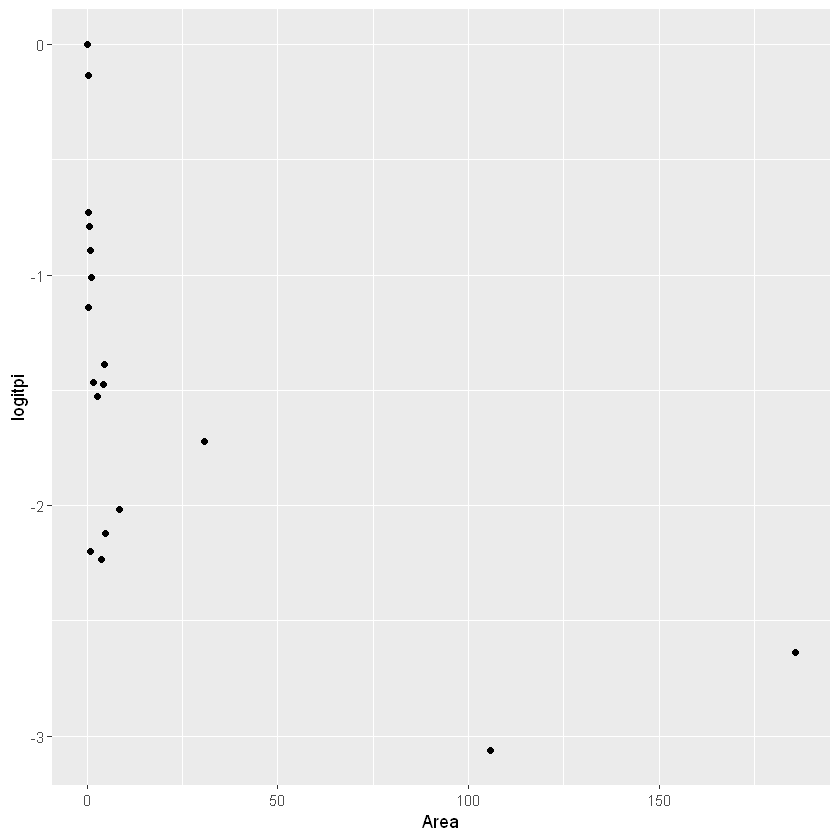

In [2]:
ggplot(krunnit, aes(x=Area, y=logitpi)) + geom_point()

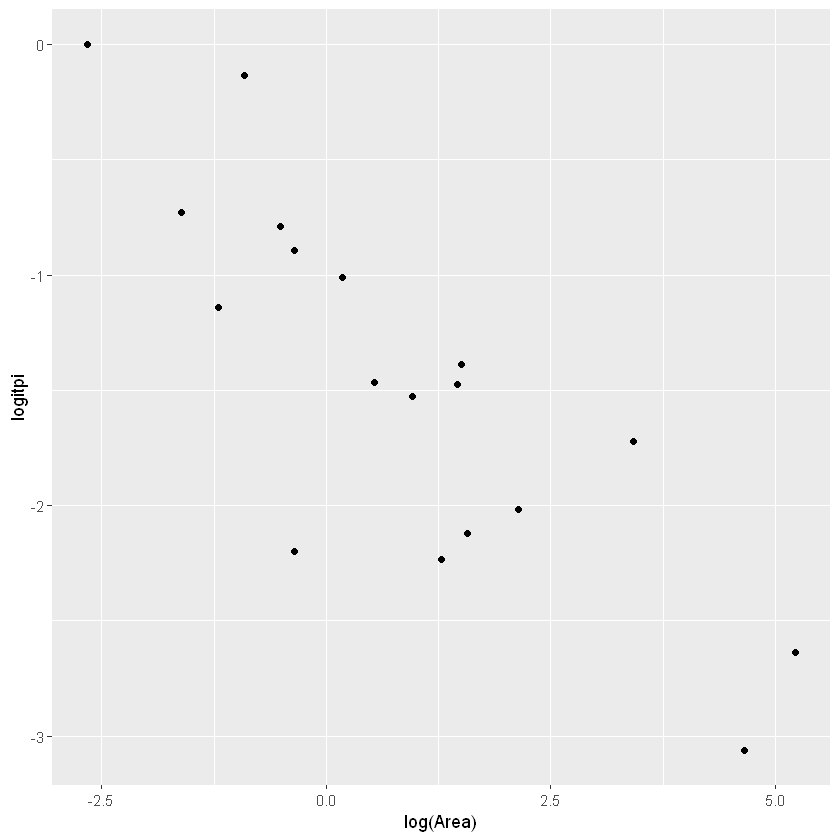

In [3]:
ggplot(krunnit, aes(x=log(Area), y=logitpi)) + geom_point()

Then the proposed model is based on plot
$$\log(\frac{\pi_i}{1-\pi_i})=\beta_0 + \beta_1 \log(Area_i)$$

In [4]:
# cbind(Extinct, NExtinct ~ log(Area) is the way to represent it in R
fitbl <- glm(cbind(Extinct, NExtinct)~log(Area), family=binomial, data=krunnit)
summary(fitbl)


Call:
glm(formula = cbind(Extinct, NExtinct) ~ log(Area), family = binomial, 
    data = krunnit)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.71726  -0.67722   0.09726   0.48365   1.49545  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.19620    0.11845 -10.099  < 2e-16 ***
log(Area)   -0.29710    0.05485  -5.416 6.08e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 45.338  on 17  degrees of freedom
Residual deviance: 12.062  on 16  degrees of freedom
AIC: 75.394

Number of Fisher Scoring iterations: 4


In [5]:
anova(fitbl, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,17,45.33802,NA
log(Area),1,33.27651,16,12.06151,7.994246e-09


In [6]:
vcov(fitbl) # variance co-variance matrix

,(Intercept),log(Area)
(Intercept),0.014029452,-0.002602237
log(Area),-0.002602237,0.003008830


In [7]:
# 95% CI for beta
CL = cbind(bhat=coef(fitbl), confint.default(fitbl))
CL

,bhat,2.5 %,97.5 %
(Intercept),-1.1961955,-1.4283454,-0.9640456
log(Area),-0.2971037,-0.4046132,-0.1895942


#### Model summary
#observations: 18  
#coefficients: 2  
fitted model $logit(\hat\pi) = -1.196-0.297\log(Area)$


Wald procedures still work the same

$H_0:\beta_1=0$  
$z=\frac{\hat\beta_1}{se(\hat\beta_1)}\sim N(0,1)$  
CI: $\hat\beta_1\pm t_{\alpha,1}se(\hat\beta_1)$

## Interpretation of $\beta_1$

Model: 
$$logit(\pi) = \beta_0 + \beta_1\log(x)\Rightarrow\\
\\frac{pi}{1-\pi} = e^{\beta_0}e^{\beta_1\log(x)} = e^{\beta_0}x^{\beta_1}$$
CHanging $x$ by a factor of $h$ will change the odds by a multiplicative factor of $h^{\beta_1}$

Example:
Halving island area changes odds by a factor of $0.5^{-0.2971} = 1.23$

Therefore, the odds of extinction on a smaller island are 123% of the odds of extinction on an island double its size. 

Halving of area is associated with an increase in the odds of extinction by an estimated 23%. An approximate 95% confidence interval for the percentage change in odds is 14%-32%

In [8]:
# CI of beta's for halfing area
0.5^(CL)

,bhat,2.5 %,97.5 %
(Intercept),2.291346,2.691379,1.950773
log(Area),1.228675,1.323734,1.140443


In [9]:
phats = predict.glm(fitbl, type="response")
options(digits=4)
rbind(Extinct, NExtinct, pis, phats)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Extinct,5.00000,3.00000,10.00000,6.0000,3.0000,4.000,8.0000,3.00000,5.0000,6.0000,8.0000,2.0000,9.0000,5.0000,7.0000,8.0000,13.0000,3.0000
NExtinct,70.00000,64.00000,56.00000,45.0000,25.0000,16.000,35.0000,28.00000,23.0000,26.0000,22.0000,18.0000,22.0000,11.0000,8.0000,25.0000,27.0000,3.0000
pis,0.06667,0.04478,0.15152,0.1176,0.1071,0.200,0.1860,0.09677,0.1786,0.1875,0.2667,0.1000,0.2903,0.3125,0.4667,0.2424,0.3250,0.5000
phats,0.06017,0.07036,0.09854,0.1380,0.1595,0.162,0.1639,0.17125,0.1854,0.2052,0.2226,0.2516,0.2516,0.2603,0.2842,0.3019,0.3278,0.3998


Question: estimate the probability of extinction for a species on the Ulkokrunni island (Area $= 185.5 km^2$)

$logit(\hat\pi_{M,1}=)-1.196 - 0.297\log(185.5) = -2.75$

$\hat\pi_{M,1} = 0.06$

In [10]:
logit_result = -1.196 - 0.297 * log(185.5)
pi_m1 = exp(logit_result) / (1+ exp(logit_result))
print(logit_result)
print(pi_m1)

[1] -2.747
[1] 0.06024


## Diagnostics

Model assumptions
 - Underlying probability model is Binomial  variance non constant, is a function of the mean
 - Observation independent
 - The form of the model is correct  
  - Liner relationship between logits and explanatory variables
  - All relevant variables are included, irrelevant ones excluded
 - Sample size is large enough for valid inferences
  - outliers

#### Saturated Model
Model that fits exactly with the data  
Most general model possible for the data

Consider one explanatory variable, X with $n$ unique levels for the outcome, $Y\sim Binomial(m,\pi)$

**Saturated Model** as many parameter coefficients as $n$

**Fitted Model**  nested within a FULL model, has (p+1) parameters

**Null Model**L intercept only

#### Checking model adequacy: Form of the model - Deviance Goodness of Fit Test

Form of Hypothesis: $H_0: $ reduced model, $H_a: $ Full model

Deviance GOF test compares the fitted model $M$ to the saturated model $S$

Test Statistic: $$Deviance = -2\log(\mathcal{L}_R/\mathcal{L}_F)\sim \chi^2_{n-p-1}$$
This is an asymptotic approximation, so it works better if each $m_i>5$

In [11]:
summary(fitbl)


Call:
glm(formula = cbind(Extinct, NExtinct) ~ log(Area), family = binomial, 
    data = krunnit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7173  -0.6772   0.0973   0.4837   1.4954  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.1962     0.1184  -10.10  < 2e-16 ***
log(Area)    -0.2971     0.0549   -5.42  6.1e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 45.338  on 17  degrees of freedom
Residual deviance: 12.062  on 16  degrees of freedom
AIC: 75.39

Number of Fisher Scoring iterations: 4


**Example** Deviance GOF with R-output
$H_0:$ Fitted model $logit(\pi)~\log(Area)$   
$H_a: $ Saturated model

Test statistic: $Deviance = 12.062$ (Residual deviance)

Distribution: $Deviance\sim \chi^2_{18-2}$

p-value: $P(\chi^2_{16}\leq 12.062) = 0.74$

Conclusion: the data are consistent with $H_0$; the simpler model with linear function of log(Area) is adequate (fit as well as the saturated model)

In [12]:
# calculate p-value for example
1 - pchisq(12.062, 16)

[1] 0.7397

Small deviance leads to larger p-value and vice versa.

Large p-value means:
 - fitted model is adequate
 - Test is not powerful enough to detect inadequacies
 
Small p-value means:
 - fitted model is not adequate, consider a more complex model with more explanatory variables or higher order terms and so on OR
 - response distribution is not adequately modeled by the Binomial distribution, OR
 - There are severe outliers

#### Outliers
**Response (raw) residuals**
$$\hat\pi_{S,i}-\hat\pi_{M,i}=y_i/M_i-\hat\pi_{M,i}$$
**Standardized residuals**  
- Pearson Residuals: uses estimate of s.d. of $Y$ $$P_{res,i}=\frac{y_i-m_i\hat\pi_{M,i}}{\sqrt{m_i\hat\pi_{M,i}(1-\hat\pi_{M,i})}}$$
- Deviance Residuals: defined so that the sum of the square of the residuals is the deviance
$$D_{res,i}=sign(y_i-m_i\hat\pi_{<i})\sqrt{2(y_i\log(\frac{y_i}{m_i\hat\pi_{M,i}})+(m_i-y_i)\log(\frac{m_i-y_i}{m_i-m_i\pi\hat\pi_{M,i}}))}$$

In [44]:
# response residuals
rres = residuals(fitbl, type="response")
# pearson residuals
pres = residuals(fitbl, type="pearson")
# Deviance residuals
dres = residuals(fitbl, type="deviance")
cbind(pis, phats, rres, pres, dres)

pis,phats,rres,pres,dres
0.06667,0.06017,0.006493,0.23646,0.23266
0.04478,0.07036,-0.025585,-0.81883,-0.87369
0.15152,0.09854,0.052975,1.44400,1.34958
0.11765,0.13800,-0.020351,-0.42139,-0.43071
0.10714,0.15946,-0.052319,-0.75619,-0.79584
0.20000,0.16205,0.037951,0.46058,0.44746
0.18605,0.16389,0.022155,0.39247,0.38577
0.09677,0.17125,-0.074480,-1.10075,-1.18097
0.17857,0.18542,-0.006844,-0.09318,-0.09363
0.18750,0.20524,-0.017742,-0.24850,-0.25127


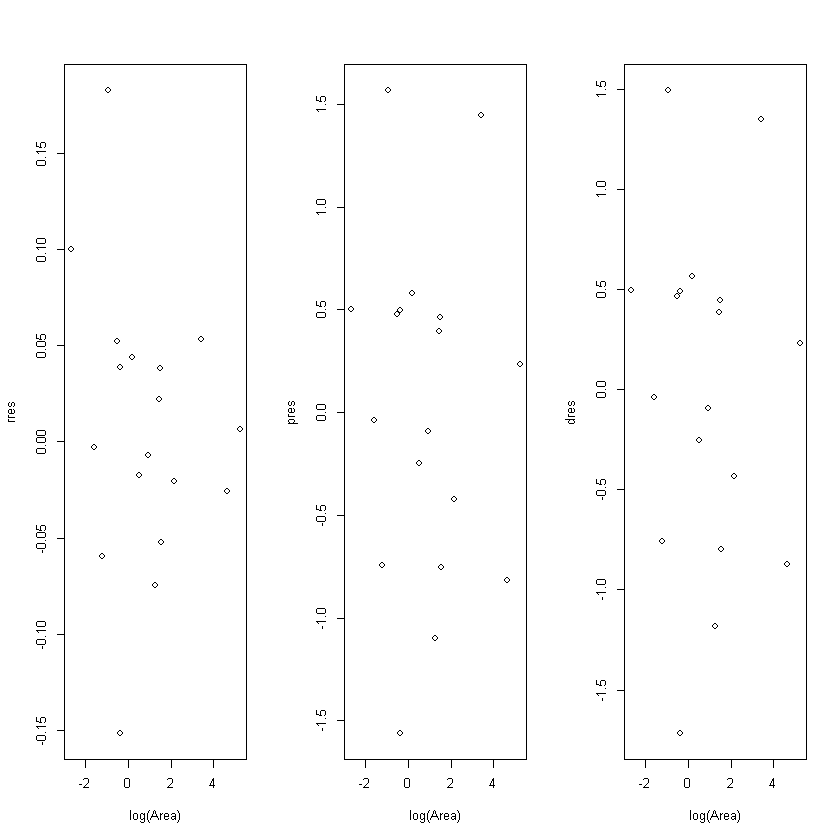

In [49]:
par(mfrow=c(1,3))
plot(log(Area), rres)
plot(log(Area), pres)
plot(log(Area), dres)


**Pearson vs Deviance Residuals**
 - Both asymptotically to $N(0,1)$
 - Possible outlier if $|res|>2$
 - Definite outlier if $|res|>3$
 - Under small $n$ $D_{res}$ closer to $N(0,1)$ then $P_{res}$
 - When $\hat\pi$ close to extreme (0, 1), $P_{res}$ are unstable

## Problems and Solutions

**Issues Related to General Linear Models**

extrapolation  
- Don't make inferences/predictions outside range of observed data
- Model may no longer be appropriate

Multicollinearity  
Consequences includes
 - unstable fitted equation
 - Coefficient that should be statistically significant while not
 - Coefficient may have wrong sign
 - Sometimes large $se(\beta)$
 - Sometimes numerical procedure to find MLEs does not converge
 
Influential Points

Model: overfit issue, should build model on training data (cross validation)


**Problems specific to Logistic Regression**

Extra-binomial variation (over dispersion)
 - variance of $Y_i$ greater than $m_i\pi_i(1-\pi_i)$
 - Does not bias $\hat\beta$'s but se of $\hat\beta$'s will be too small 
 
Solution: add one more parameter to the model, $\phi$-dispersion parameter. Then $var(Y_i)=\phi m_i\pi_i(1-\pi_i)$

Complete separation
 - One or a linear combination of explanatory variables perfectly predict whether $Y=1\lor 0$
 - In Binary response, when $y_i=1,\hat y_i=1$, then $\sum_{i=1}^n\{y_i\log(\hat y_i + (1-y_i)\log(1-\hat y_i))=0\}$
 - MLE cannot be computed
 
Quasi-complete separation:
- explanatory variables predict $Y=1\lor 0$ almost perfectly
- MLE are numerically unstable

SOlution: simplify the model. Try other methods like penalized maximum likelihood, exact logistic regression, Bayesian methods